# Multiple Linear Regression
## Car price prediction in American market

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Essentially, the company wants —


- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

**This worksheet aims to perform Explorator Data Analysis and Multiple Linear regression on Car price data for American market. Primary focus is to deriving variables which are most significant in predicting the price of the car  , i.e. creating a model with most significant variables and stating how well those variables describe the price of the car**

## 1. Exploratory Data Analysis

### 1.1 Data Sourcing

In [1]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
warnings.filterwarnings('ignore')
#Apply formatting to floats
pd.options.display.float_format = '{:20,.2f}'.format
# Shuffle the data
np.random.seed(0)

In [2]:
#Read csv to dataframe 
cars_df = pd.read_csv('CarPrice_Assignment.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


### Understanding the data

__Objective:__ 
1. Find no of rows/columns in cars_df.
2. Identify no of unique values in each column.
3. Identify percentage of null values in each column.

In [3]:
#find no of rows and columns in cars_df
cars_df.shape

(205, 26)

In [4]:
#find data type of each column and no of non null values in each columns
cars_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
#percentage of null values in each column
round(100*(cars_df.isnull().sum()/len(cars_df.index)),2)

car_ID                             0.00
symboling                          0.00
CarName                            0.00
fueltype                           0.00
aspiration                         0.00
doornumber                         0.00
carbody                            0.00
drivewheel                         0.00
enginelocation                     0.00
wheelbase                          0.00
carlength                          0.00
carwidth                           0.00
carheight                          0.00
curbweight                         0.00
enginetype                         0.00
cylindernumber                     0.00
enginesize                         0.00
fuelsystem                         0.00
boreratio                          0.00
stroke                             0.00
compressionratio                   0.00
horsepower                         0.00
peakrpm                            0.00
citympg                            0.00
highwaympg                         0.00


__Thus observed that data does not contain null values__

In [6]:
#Lets understand the distribution of numeric columns
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,1.00,-2.00,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,52.00,0.00,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,103.00,1.00,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,154.00,2.00,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,205.00,3.00,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


In [7]:
#no. of unique values in each column
cars_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

__Summary:__
1. There are total 26 columns and 205 rows in car_df.
2. There are no columns having null values.
3. Also, there are some columns having only few categorical values.
4. car_ID is unique in all the records.
5. By looking at it has been observed that no outliers are there in numerical columns.

### 1.2 Visualization

In [8]:
#Draw Heatmap
def draw_heatmap(filtered_df,exclude=None): 
    plt.subplots(figsize=(20,20))
    if exclude is not None:
        columns=[col for col in filtered_df.columns if col not in exclude]
    else:
        columns=filtered_df
        
    data=filtered_df[columns]    
    corr=data.corr()
    sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

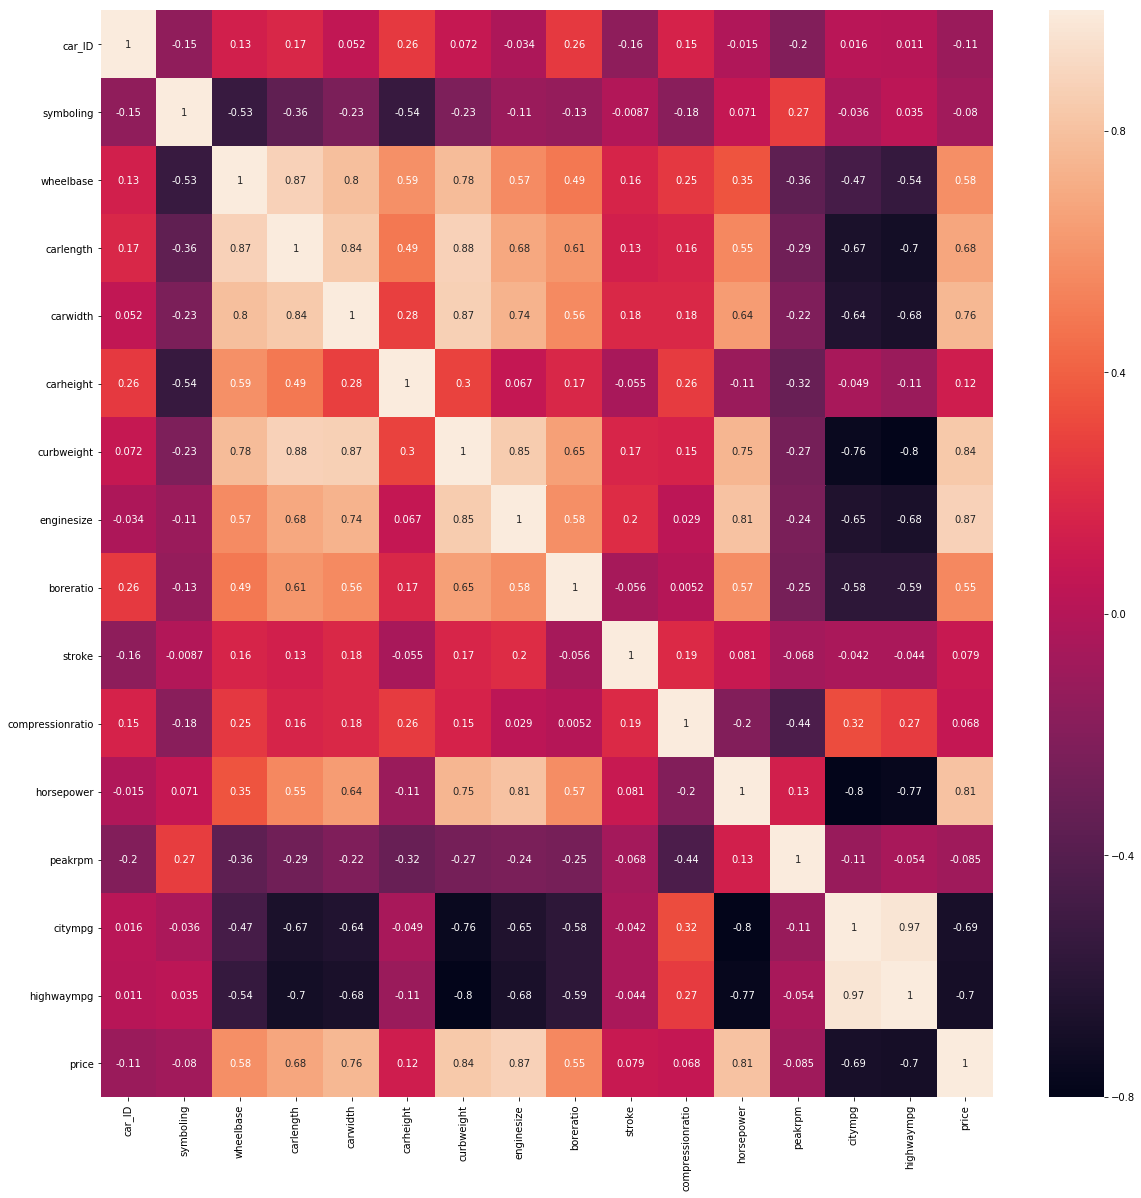

In [9]:
draw_heatmap(filtered_df=cars_df,exclude=[])

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

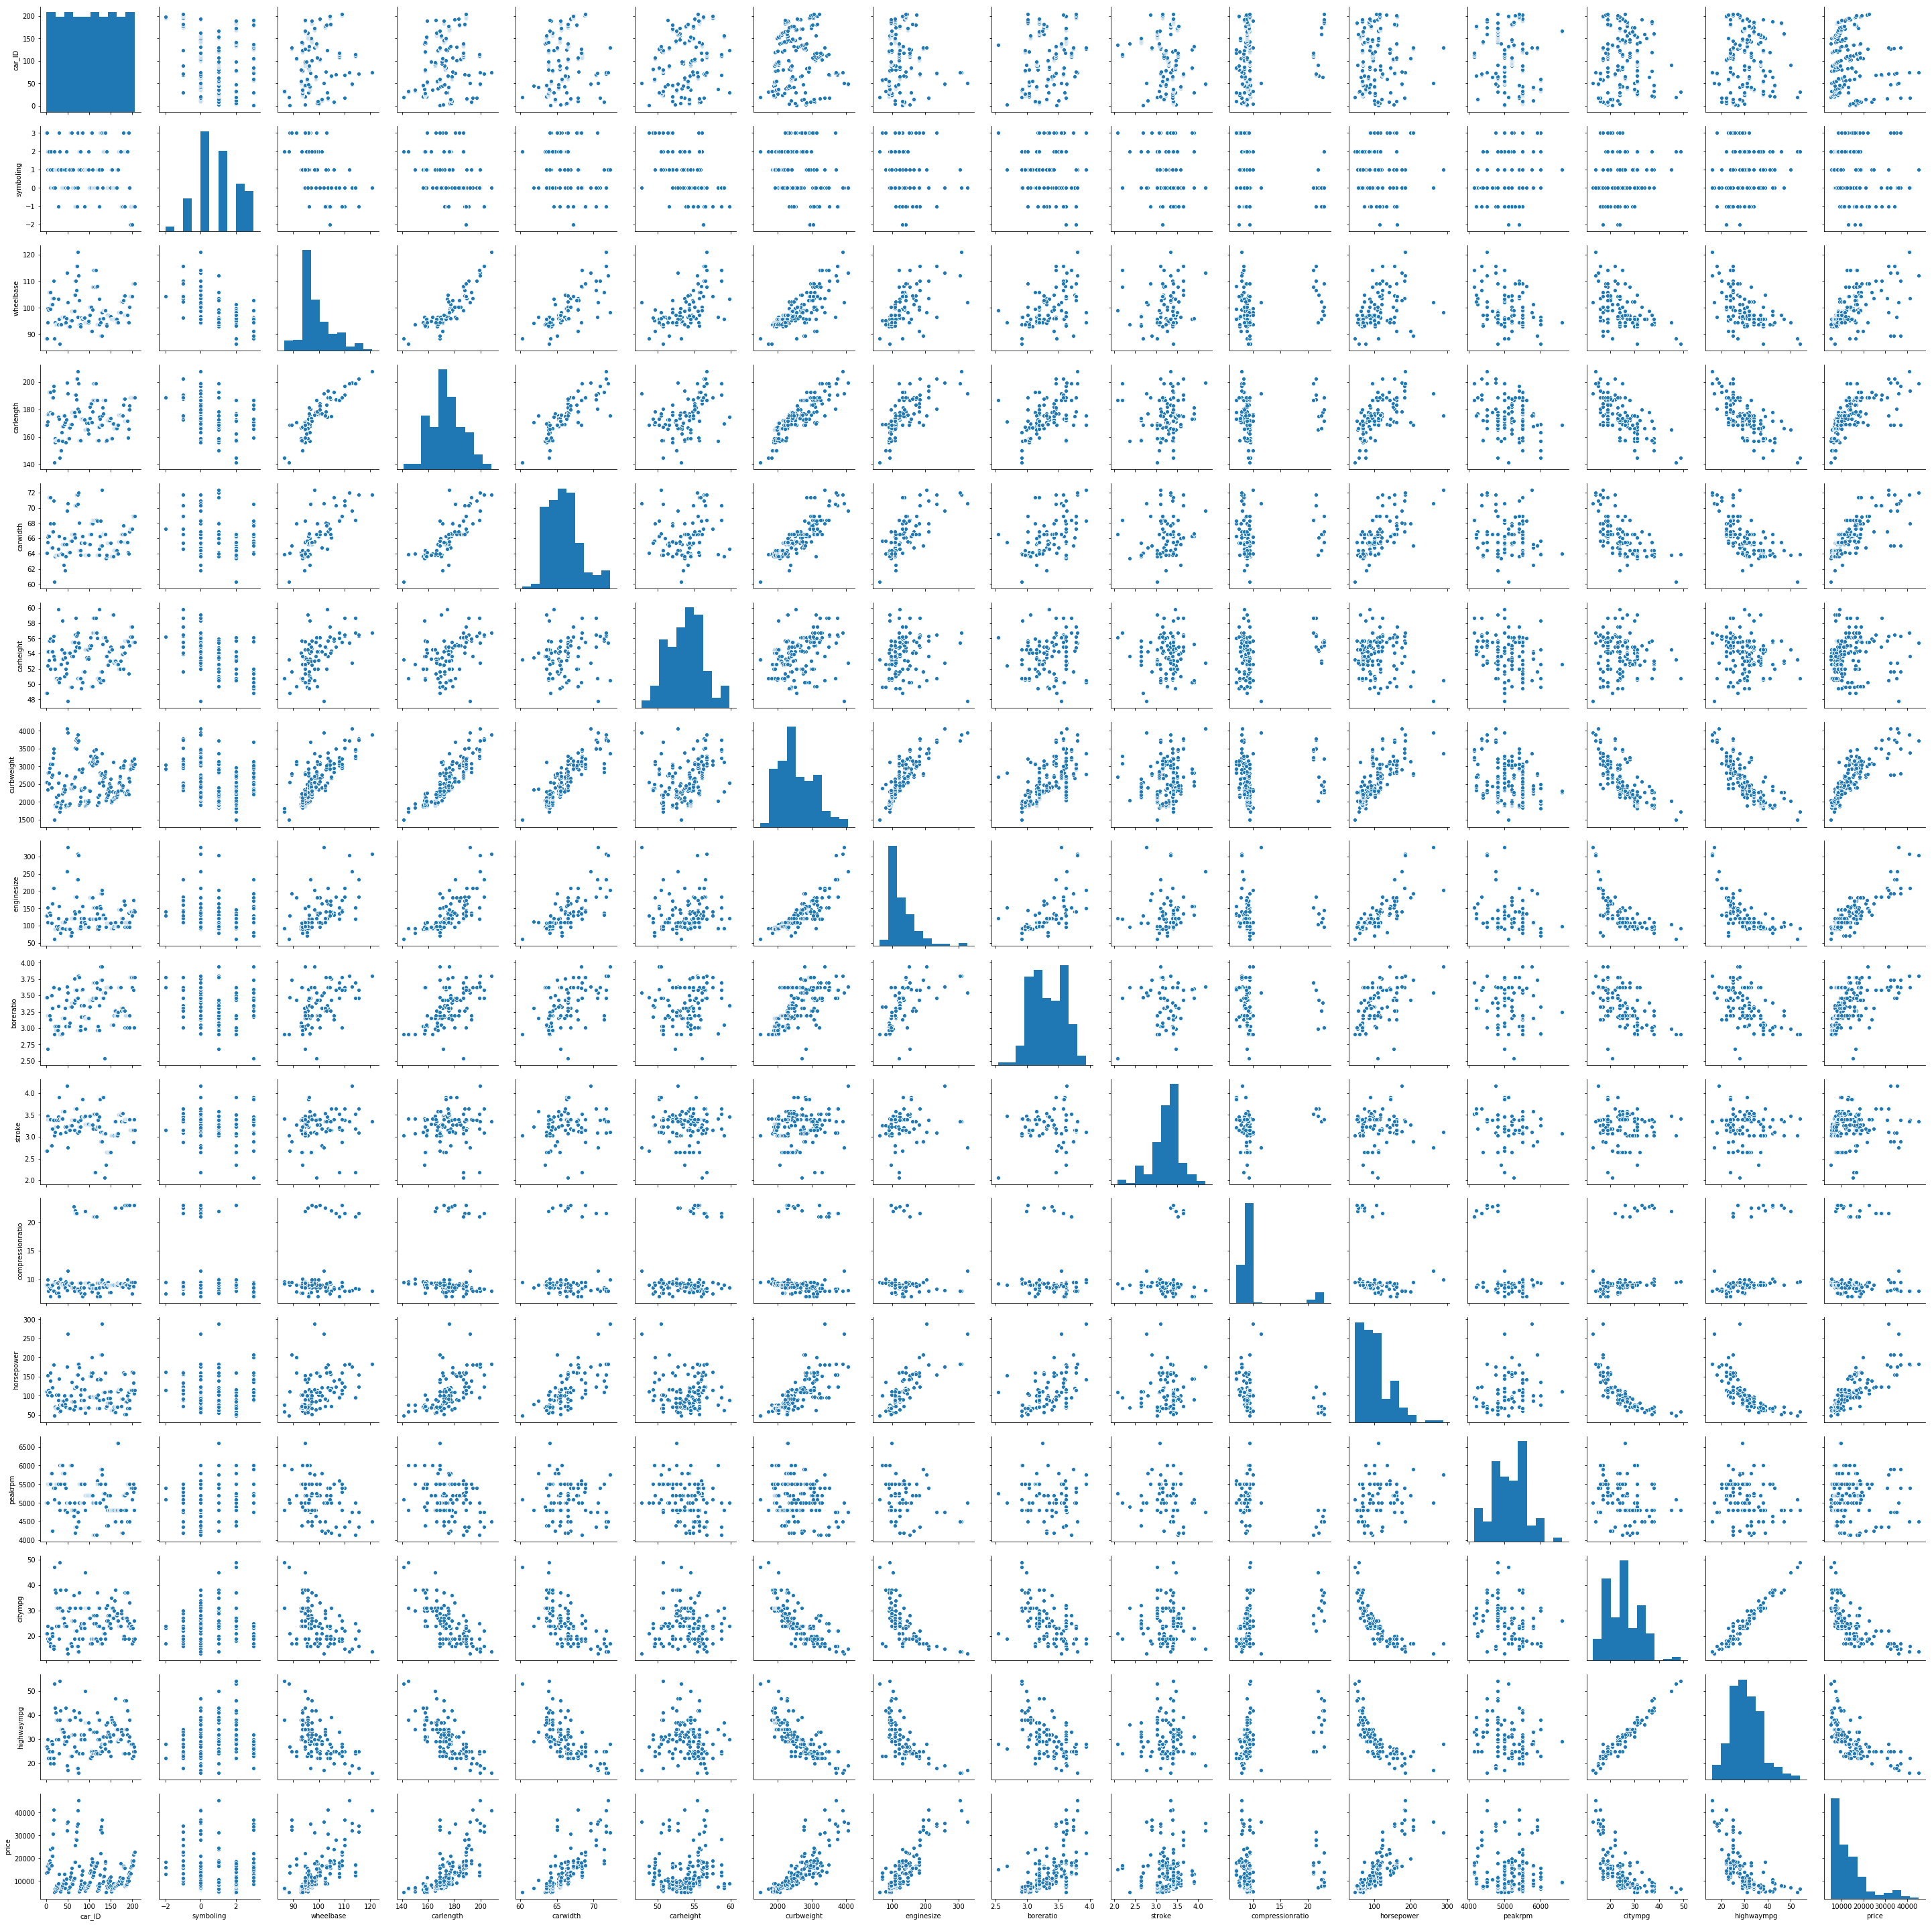

In [10]:
sns.pairplot(cars_df)
plt.show()

__Summary (Feature Relation with Price):__
1. +ve correlation with low variance - `enginesize`
2. +ve correlation with medium variance - `carlength` 
3. +ve correlation with high variance - `boreratio`
4. -ve correlation with medium variance - `citympg` 
5. No significant correlation - `carheight`, `stroke` , `compressionratio`, `peakrpm`


__Summary (Feature Relation with Other Variables):__
1. `wheelbase` is positively highly correlated with `carlength`, `carwidth` , `curbweight`
2. `carlength` is positively highly correlated with  `wheelbase`,`carwidth`,`curbweight`,`enginesize`
3. `carwidth` is positively highly correlated with `wheelbase` , `carlength` ,`curbweight`, `enginesize` and `horsepower`
4. `curbweight` is positively highly correlated with `wheelbase`,`carlength`,`carwidth`,`enginesize`,`boreratio`,`horsepower`
5. `enginesize` is positively highly correlated with `carlength`,`carwidth`,`curbweight`,`horsepower`
6. `horsepower` is positively highly correlated with `carwidth`,`curbweight`,`enginesize`
7. `citympg` and `highwaympg` are positively highly correlated with each other
8. `citympg` and `highwaympg` are negatively highly correlated with `curbweight`,`enginesize`,`horsepower`,`price`


### 1.3 Data Cleaning And Preparation

__As per the data preperation part it is mentioned in problem:
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building.__

In [11]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


In [12]:
#Separating company name 
cars_df['CarName']=cars_df['CarName'].apply(lambda v: v.split(' ')[0].lower())



In [13]:
cars_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

__Observed that some car names have been misspelled__

- Original company name: __mazda__ -> At some places `maxda` is used
- Original company name: __porsche__ -> At some places `porcshce` is used
- Original company name: __toyota__ -> At some places `toyouta` is used
- Original company name: __volkswagen__ -> At some places `vokswagen` and `vw` are used

In [14]:
#Correcting car company's name wherever misspelled
def change_string(x):
    return x.replace('maxda', 'mazda').replace("porcshce","porsche").replace('toyouta', 'toyota').replace('vokswagen', 'volkswagen').replace('vw', 'volkswagen')

cars_df['CarName'] = cars_df['CarName'].map(lambda x: change_string(x))

In [15]:
cars_df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

Dropping unnecessary column

- `Car_ID` is unnecessary.

Thus dropping it

In [16]:
cars_df.drop(['car_ID'], axis =1, inplace = True)



In [17]:
cars_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

Rename  `mfi` --> `mpfi`(multi port/point fuel injection) as they mean same in fuel system 


Refer to links:
 - https://www.slideshare.net/mihirpatel153/multipoint-fuel-injection-system


 - https://www.cars.com/articles/what-are-the-different-types-of-fuel-injection-1420690418419/

In [18]:
cars_df['fuelsystem']=cars_df['fuelsystem'].replace({'mfi':'mpfi'})



In [19]:
cars_df['fuelsystem'].value_counts()

mpfi    95
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
Name: fuelsystem, dtype: int64

Checking number of each values in each categorical column

In [20]:
categorical_variable=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for cat in categorical_variable:
    print(cars_df[cat].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    95
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
Name: fuelsystem, dtype: int64


Changing mapping of doornumber , fueltype, aspiration, enginelocation as the have only two values

In [21]:
#For plots and clear interpretation a copy is made
filtered_df=cars_df.copy()

    


In [22]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

Bring to same format for numeric columns

In [23]:
num_features = ['carlength', 'carheight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm','citympg','horsepower', 'price','highwaympg','carwidth','curbweight','wheelbase']
filtered_df[num_features] = filtered_df[num_features].astype(float)

Checking for duplicate rows

In [24]:
duplicateRowsDF = filtered_df[filtered_df.duplicated()]
duplicateRowsDF

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### 1.4 Derived Variables

Creating Average MPG from __(highwaympg+citympg)/2__ 

In [25]:
filtered_df['avgmpg']=(filtered_df['highwaympg']+filtered_df['citympg'])/2

#amending in its copy also as we have to show its plot
cars_df['avgmpg']=(cars_df['highwaympg']+cars_df['citympg'])/2

Dropping citympg and highwaympg as they will include high correlation after adding avgmpg

In [26]:
filtered_df.drop(['highwaympg','citympg'], axis =1, inplace = True)

### 1.5 Exploratory Data Analysis

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

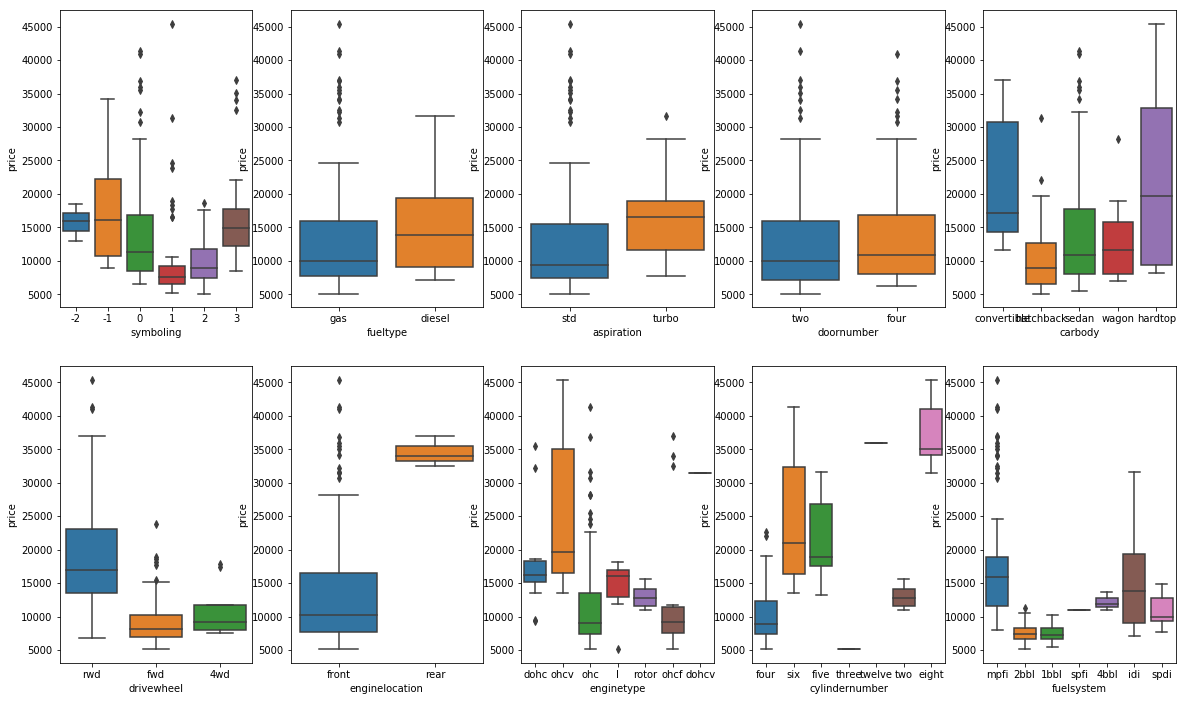

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,5,1)
sns.boxplot(x = 'symboling', y = 'price', data = cars_df)
plt.subplot(2,5,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_df)
plt.subplot(2,5,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_df)
plt.subplot(2,5,4)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)
plt.subplot(2,5,5)
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)
plt.subplot(2,5,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)
plt.subplot(2,5,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)
plt.subplot(2,5,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)
plt.subplot(2,5,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)
plt.subplot(2,5,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)
plt.show()

__Observations:__
1. Cars with symboling as -1 are higher priced.
2. Cars with fueltype as diesel are higher priced.
3. Cars with aspiration as turbo are generally higher priced.
4. Door numbers does not seem to play significant impact on car price
5. Cars with carbody as convertible or hardtop are higher priced.
6. Cars with drivewheel as rwd are higher priced.
7. Cars with rear engine location are definitely higher in price.
8. Cars with engine type as ohcv are definitely higher priced.
9. Cars with 8 cylinders are definitely higher in price
10. Cars with fuelsystem as mpfi and idi are higher priced.

__Now observing distribution of price by car company__

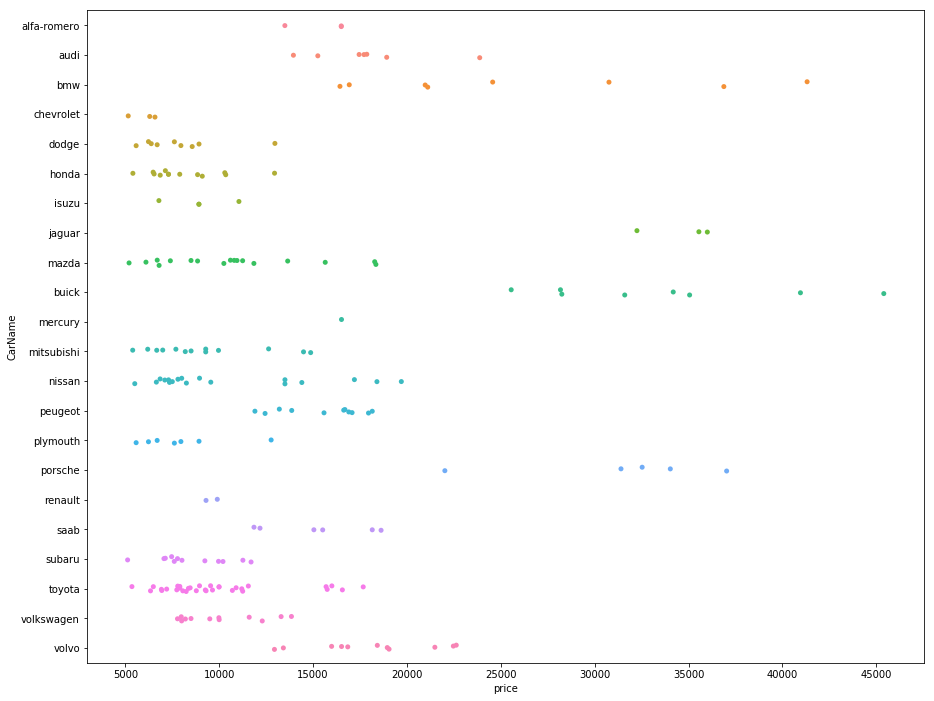

In [29]:
plt.subplots(figsize=(15, 12))
sns.stripplot(data = cars_df, x='price', y='CarName')
plt.show()

__Observations:__
1. Car companies like Chevrolet,Subaru,Renault,ISuzu,Toyota have lower price distribution ranges.
2. Whereas car companies like BMW,Buick,Jaguar,Porche have higher price distribution ranges.

In [30]:
def univariate_continous_plot(df,col):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1, ncols=3, figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Violin Plot")
    sns.violinplot(data =df, x=col, ax=ax[1], inner="quartile")
    ax[2].set_title("Box Plot")
    sns.boxplot(data =df, x=col, ax=ax[2], orient='v')
    plt.show()

In [31]:
def univariate_categorical_plot(df,col,hue=None, style=1,fixwid=10,fixlen=10):
    
    sns.set(style="darkgrid")
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
   
    if style == 0:
        fig.set_size_inches(fixwid , fixlen)
        ax = df[col].value_counts().plot(kind='pie', label=col,autopct='%1.0f%%')
    else:
        width = len(df[col].unique()) + 6 #+ 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                height = np.nan_to_num(p.get_height(), 0)
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05,height+20))  
        else:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.32, p.get_height()+20)) 
    del temp
    plt.show()
    


In [32]:
def plot_boxplot_vs_(vs_x,column, order=None, figsize=(15,5), nRow=1, nCol=2, h=None):
    plt.figure(figsize=figsize)
    plt.subplot(nRow, nCol, 1) #plot vs vs_x
    plt.xlabel(column)
    plt.ylabel(vs_x)
    plt.title('Distribution of '+vs_x+' vs '+ column)
    sns.boxplot(x=column, y=vs_x,data=cars_df, order=order)
    
    plt.subplot(nRow, nCol, 2) #plot vs vs_x hue x
    plt.xlabel(column)
    plt.ylabel(vs_x)
    plt.title('Distribution of '+vs_x+' by '+h+' vs '+ column)
    sns.boxplot(x=column, y=vs_x,  hue=h,data=cars_df, order=order)
    plt.show()

In [33]:
def create_dummy(feature,filtered_df):
    # Get the dummy variables for the feature and store it in a new variable - 'status'
    # Let's drop the first column from status filtered_df using 'drop_first = True'
    status = pd.get_dummies(filtered_df[feature], prefix=feature,drop_first = True)
    # Add the results to the original filtered_df dataframe
    filtered_df = pd.concat([filtered_df, status], axis = 1)
    # Drop original feature as we have created the dummies for it
    filtered_df.drop([feature], axis = 1, inplace = True)
    return filtered_df

In [34]:
def VIF(model_df):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = model_df.columns
    vif['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [35]:
def one_hot_encoding(df,col_name,col1,col2):
    df[col_name]=df[col_name].map({col1:0,col2:1})
    return df

__By observation of Categorical Variables we now see which can be significant in terms of numbers.Carrying univariate and bivariate analysis on same.__

### 1.6 Analyzing important distributions 

#### 1.6.1 CarName

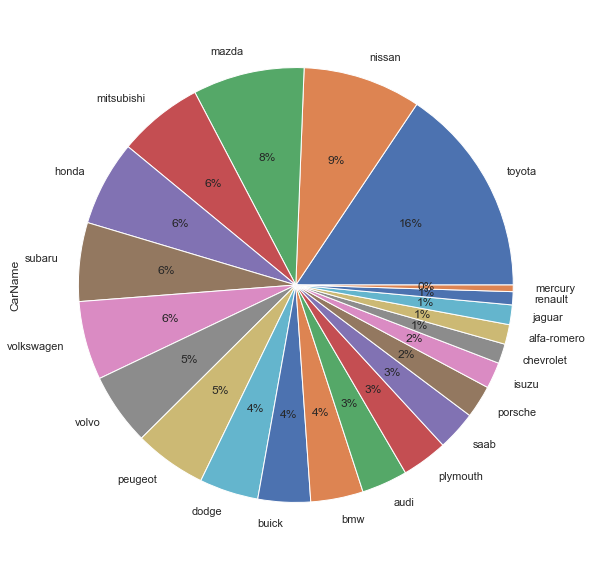

In [36]:
univariate_categorical_plot(cars_df, 'CarName', style=0)

__Observations:__
1. Toyota is highest bought car
2. Renault, Alfa Romero, Chevorlet and Jaguar are least bought ones

#### 1.6.2 Price

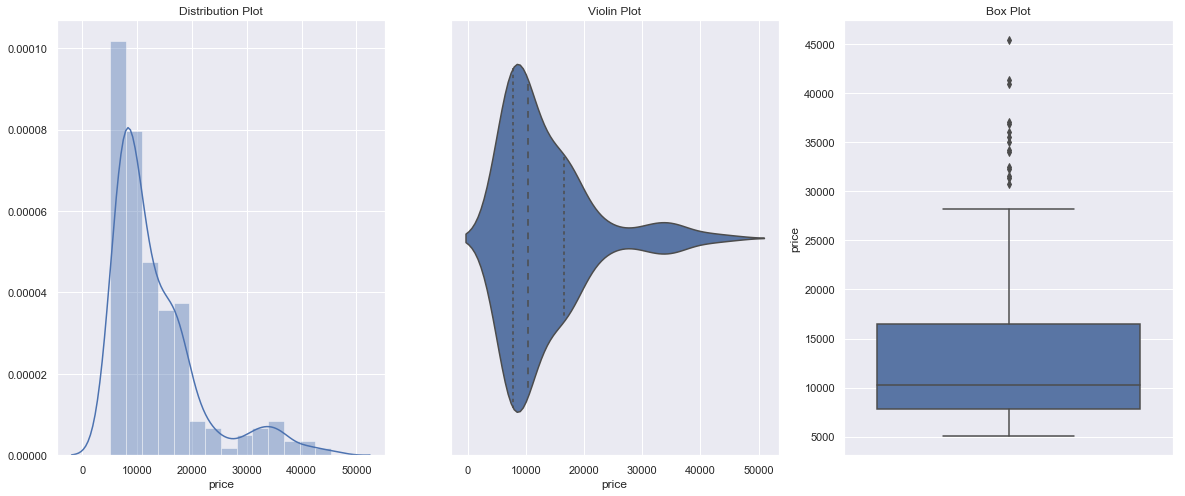

In [37]:
univariate_continous_plot(cars_df,'price')

__Mostly car price is ranged between 8000 to 17000__

#### 1.6.3 Some Observations

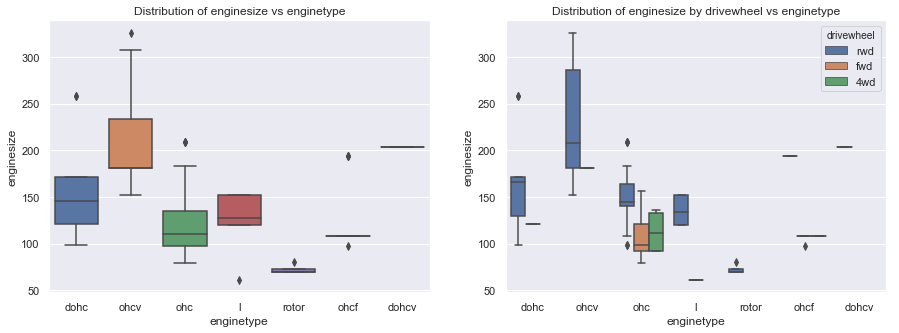

In [38]:
plot_boxplot_vs_(vs_x='enginesize',column='enginetype',h='drivewheel')

__Observations:__
1. Observed that most bigger engine sized vehicles have `ohcv` enginetype and `rwd` as drivewheel

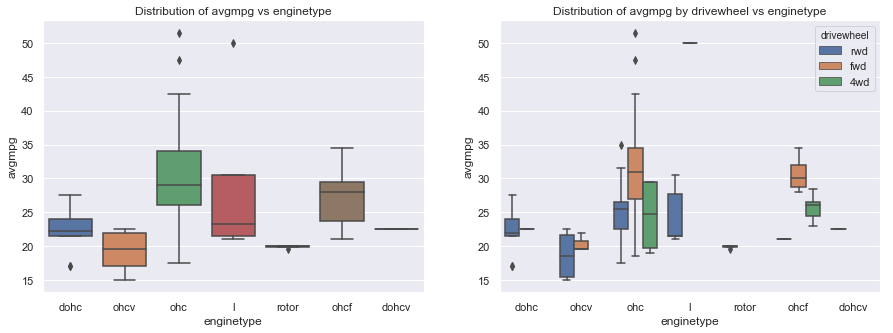

In [39]:
plot_boxplot_vs_(vs_x='avgmpg',column='enginetype',h='drivewheel')

__Observations:__
1. Observed that most high avgmpg cars use `fwd` drivewheel and `ohc` enginetype.

### 1.7 Multiple Linear Regression 

#### 1.7.1 Create Dummy Variables

In [40]:
filtered_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'avgmpg'],
      dtype='object')

The variables `symboling`,`CarName`  ,`carbody` , `drivewheel`  , `enginetype`  ,`fuelsystem`,`cylindernumber`,`doornumber`,`fueltype`,`aspiration`,`enginelocation` are categorical .
We need to convert these into integers. 

For this, we will use `dummy variables`.

In [41]:
features='symboling','CarName'  ,'carbody' , 'drivewheel'  , 'enginetype'  ,'fuelsystem','cylindernumber','doornumber','fueltype','aspiration','enginelocation'

In [42]:

for feature in features:
    filtered_df=create_dummy(feature,filtered_df)

In [43]:
filtered_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'avgmpg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',


#### 1.7.2 Splitting the Data into Training and Testing Sets 

In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(filtered_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 1.7.3 Rescaling the features
We will use MinMax scaling.

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'avgmpg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',


In [47]:
# Apply scaler() to all the columns except the categorical and 'dummy' variables
num_vars = ['carlength', 'carheight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm','horsepower', 'price','avgmpg','carwidth','curbweight','wheelbase']
num_vars


['carlength',
 'carheight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'horsepower',
 'price',
 'avgmpg',
 'carwidth',
 'curbweight',
 'wheelbase']

In [48]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,doornumber_two,fueltype_gas,aspiration_turbo,enginelocation_rear
122,0.24,0.43,0.29,0.27,0.27,0.14,0.23,0.53,0.15,0.08,...,0,1,0,0,0,0,0,1,0,0
125,0.27,0.45,0.67,0.21,0.50,0.34,1.00,0.46,0.16,0.40,...,0,1,0,0,0,0,1,1,0,0
166,0.27,0.45,0.31,0.42,0.31,0.14,0.44,0.45,0.15,0.27,...,0,1,0,0,0,0,1,1,0,0
1,0.07,0.45,0.32,0.09,0.41,0.26,0.63,0.25,0.12,0.26,...,0,1,0,0,0,0,1,1,0,0
199,0.61,0.78,0.58,0.86,0.65,0.26,0.75,0.48,0.03,0.48,...,0,1,0,0,0,0,0,1,1,0


#### 1.7.4 HeatMap

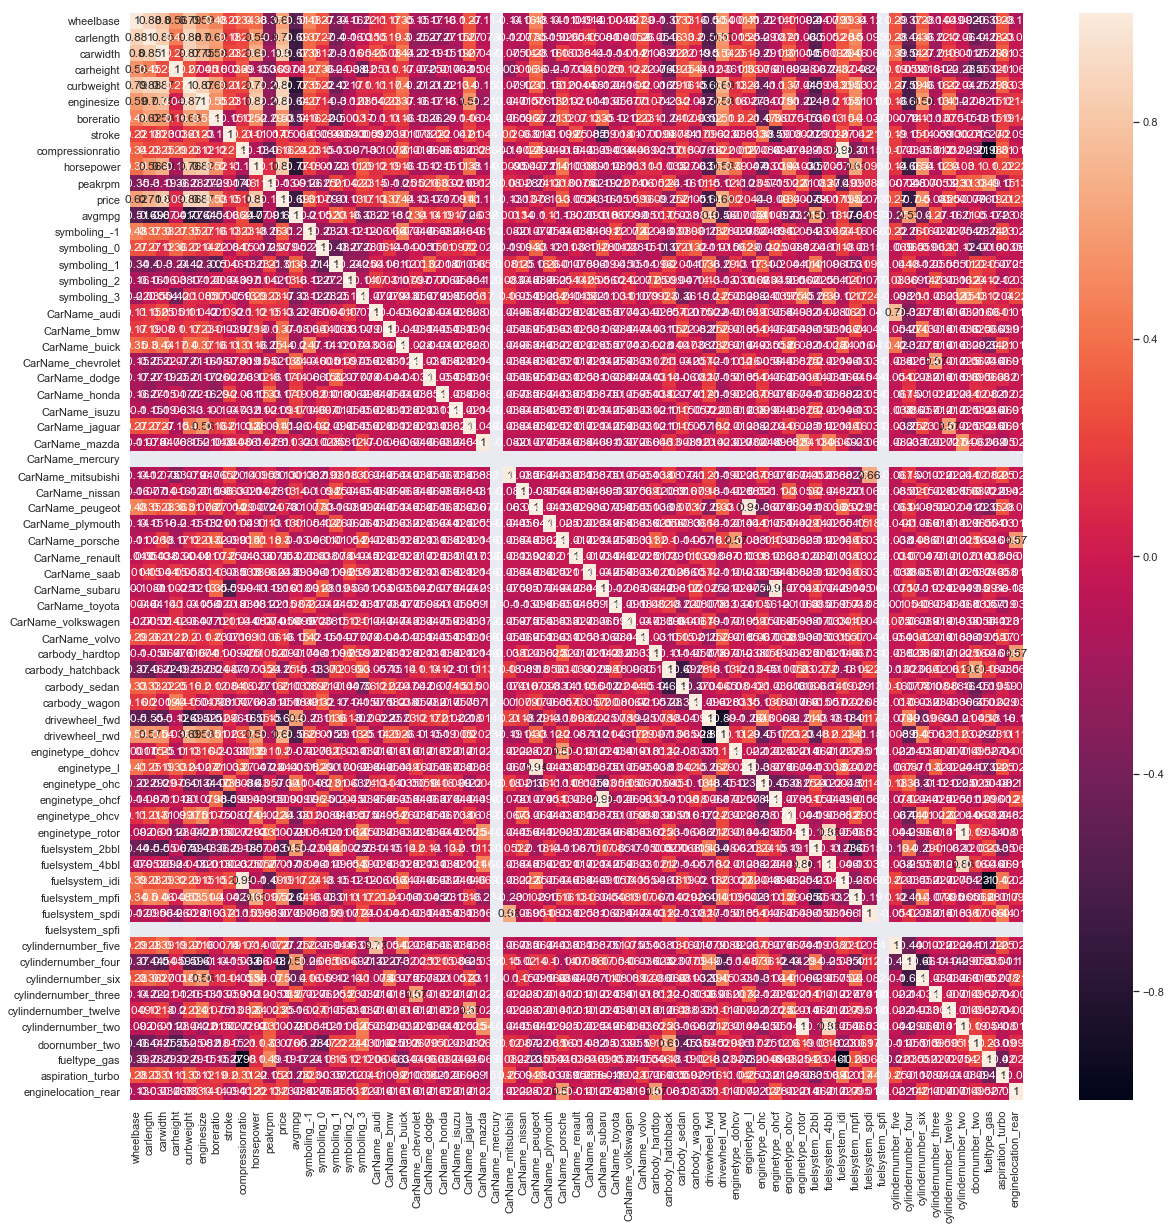

In [49]:
draw_heatmap(filtered_df=df_train,exclude=[])

#### 1.7.5 Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('price')
X_train = df_train

#### 1.7.6 Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

#### 1.7.6.1 RFE
Recursive feature elimination

#### Selecting best possible rfe theshold to start with by parameter testing or checking model Adj R Square by keeping threashold as 10, 15 & 20 

#### RFE with output number = 10

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of the variable equal to 10
rfe_10 = RFE(lm, 10)             # running RFE
rfe_10 = rfe_10.fit(X_train, y_train)
col_10 = X_train.columns[rfe_10.support_]

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col_10]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.21e-64
Time:                        11:22:51   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

#### RFE with output number = 15

In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of the variable equal to 15
rfe_15 = RFE(lm, 15)             # running RFE
rfe_15 = rfe_15.fit(X_train, y_train)
col_15 = X_train.columns[rfe_15.support_]

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col_15]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.03e-70
Time:                        11:22:53   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

#### RFE with output number = 20

In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of the variable equal to 20
rfe_20 = RFE(lm, 20)             # running RFE
rfe_20 = rfe_20.fit(X_train, y_train)
col_20 = X_train.columns[rfe_20.support_]

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col_20]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     109.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.55e-67
Time:                        11:22:54   Log-Likelihood:                 219.05
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     124   BIC:                            -343.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

#### RFE with output number = 15 is a good start as it is giving Adj R square of 0.933 thus taking that to build our first model

In [57]:
list(zip(X_train.columns,rfe_15.support_,rfe_15.ranking_))

[('wheelbase', False, 33),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 11),
 ('peakrpm', False, 14),
 ('avgmpg', False, 32),
 ('symboling_-1', False, 3),
 ('symboling_0', False, 7),
 ('symboling_1', False, 4),
 ('symboling_2', False, 5),
 ('symboling_3', False, 6),
 ('CarName_audi', False, 22),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 17),
 ('CarName_chevrolet', False, 30),
 ('CarName_dodge', False, 20),
 ('CarName_honda', False, 21),
 ('CarName_isuzu', False, 50),
 ('CarName_jaguar', False, 28),
 ('CarName_mazda', False, 43),
 ('CarName_mercury', False, 51),
 ('CarName_mitsubishi', False, 16),
 ('CarName_nissan', False, 41),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 19),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 27),
 ('CarName_saab', False, 10),
 ('Car

In [58]:
col = X_train.columns[rfe_15.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginelocation_rear'],
      dtype='object')

In [59]:
X_train.columns[~rfe_15.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'avgmpg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'cylindernumber_six',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo'],
      dtype

#### Building model using statsmodel, for the detailed statistics

In [60]:
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginelocation_rear'],
      dtype='object')

### NOTE: After some models we will be creating two branches to see which performs better. Branches will be intermediate models created by either dropping feature with High VIF or High P-value or both.

##### 1.7.6.2 Model 1

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]

In [62]:
# Adding a constant variable 
 
X_train_new = sm.add_constant(X_train_new)

In [63]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.03e-70
Time:                        11:23:12   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [65]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginelocation_rear'],
      dtype='object')

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

In [66]:
X_train_new = X_train_new.drop(['const'], axis=1)



####  Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $




In [67]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)



                 Features                  VIF
8        enginetype_rotor                  inf
13     cylindernumber_two                  inf
2              enginesize                80.71
1              curbweight                54.10
0                carwidth                41.15
3               boreratio                34.56
4                  stroke                30.89
10    cylindernumber_four                24.19
12  cylindernumber_twelve                 2.81
9     cylindernumber_five                 2.67
7         CarName_porsche                 1.93
14    enginelocation_rear                 1.71
6         CarName_peugeot                 1.62
11   cylindernumber_three                 1.23
5             CarName_bmw                 1.22


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.3 Model 2

Building this model with following columns from Model 1 :
    `carwidth`, `curbweight`, `enginesize`, `boreratio`, `stroke`,
       `CarName_bmw`, `CarName_peugeot`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `cylindernumber_four`, `cylindernumber_three`,
       `cylindernumber_twelve`, `cylindernumber_two`, `enginelocation_rear`

#### Dropping the variable with high VIF on model1 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `cylindernumber_two` as it has a  high VIF of `inf` (infinite or undefined). Let's go ahead and drop this variable as this is creating multicollinearity among other variables too.

In [68]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('cylindernumber_two', 1,)

Rebuilding the model without `cylindernumber_two`

In [69]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [70]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.03e-70
Time:                        11:23:20   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [71]:
X_train_new.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [72]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

                 Features                  VIF
2              enginesize                80.71
1              curbweight                54.10
0                carwidth                41.15
3               boreratio                34.56
4                  stroke                30.89
10    cylindernumber_four                24.19
8        enginetype_rotor                 3.95
12  cylindernumber_twelve                 2.81
9     cylindernumber_five                 2.67
7         CarName_porsche                 1.93
13    enginelocation_rear                 1.71
6         CarName_peugeot                 1.62
11   cylindernumber_three                 1.23
5             CarName_bmw                 1.22


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### Model 2 - Branch 1


Building this model with following columns from Model 2 :
`carwidth`, `curbweight`, `enginesize`, `boreratio`, `stroke`,
       `CarName_bmw`, `CarName_peugeot`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `cylindernumber_four`, `cylindernumber_three`,
       `cylindernumber_twelve`, `enginelocation_rear`

#### As P values are within range(p-value < 0.05) dropping the variable with high VIF on model2 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `enginesize` as it has a  high VIF of `80.71`(infinite or undefined as perfect collinearity). Let's go ahead and drop this variable

In [73]:
# Dropping highly correlated variables and insignificant variables
X_train_new1 = X_train_new.drop('enginesize', 1,)

Rebuilding the model without `enginesize`

In [74]:
# Build a  model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [75]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.01e-61
Time:                        11:23:40   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [76]:
X_train_new1.columns

Index(['carwidth', 'curbweight', 'boreratio', 'stroke', 'CarName_bmw',
       'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [77]:
# Check for the VIF values of the feature variables.
VIF(X_train_new1)

                 Features                  VIF
1              curbweight                40.31
0                carwidth                39.80
2               boreratio                22.51
3                  stroke                16.12
9     cylindernumber_four                10.07
6         CarName_porsche                 1.92
8     cylindernumber_five                 1.70
12    enginelocation_rear                 1.62
5         CarName_peugeot                 1.42
7        enginetype_rotor                 1.37
4             CarName_bmw                 1.21
11  cylindernumber_twelve                 1.18
10   cylindernumber_three                 1.12


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Observation:
 - There is a sudden drop in Adj. R-squared from 0.933 to 0.902 when we remove enginesize for this model . Thus we will avoid to drop enginesize in further models and look for any other strong contender for dropping based on higher p-value (p>0.05) and higher VIF (VIF>5)

##### Model 2 - Branch 2


Building this model with following columns from Model 2 :
`carwidth`, `curbweight`, `enginesize`, `boreratio`, `stroke`,
       `CarName_bmw`, `CarName_peugeot`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `cylindernumber_four`, `cylindernumber_three`,
       `cylindernumber_twelve`, `enginelocation_rear`

#### As P values are within range(p-value < 0.05) ,dropping the variable with high VIF on model2 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `curbweight` as it has a  high VIF of `54.10`(infinite or undefined as perfect collinearity). Let's go ahead and drop this variable

In [78]:
# Dropping highly correlated variables and insignificant variables
X_train_new2 = X_train_new.drop('curbweight', 1,)

Rebuilding the model without `curbweight`

In [79]:
# Build a  model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [80]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.25e-67
Time:                        11:23:54   Log-Likelihood:                 204.47
No. Observations:                 143   AIC:                            -380.9
Df Residuals:                     129   BIC:                            -339.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [81]:
X_train_new2.columns

Index(['carwidth', 'enginesize', 'boreratio', 'stroke', 'CarName_bmw',
       'CarName_peugeot', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [82]:
# Check for the VIF values of the feature variables.
VIF(X_train_new2)

                 Features                  VIF
1              enginesize                60.13
2               boreratio                34.28
0                carwidth                34.04
3                  stroke                30.58
9     cylindernumber_four                24.17
7        enginetype_rotor                 3.75
8     cylindernumber_five                 2.61
11  cylindernumber_twelve                 2.59
6         CarName_porsche                 1.83
12    enginelocation_rear                 1.71
5         CarName_peugeot                 1.33
10   cylindernumber_three                 1.23
4             CarName_bmw                 1.21


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### We have seen both approaches . Thus selecting the best amonst them based on higher Adj. R-squared(0.92) value in resultant model. Thus selecting model2 - branch2 for further modelling

##### 1.7.6.4 Model 3

In [83]:
X_train_new=X_train_new2

In [84]:
lm=lm2

In [85]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.25e-67
Time:                        11:24:05   Log-Likelihood:                 204.47
No. Observations:                 143   AIC:                            -380.9
Df Residuals:                     129   BIC:                            -339.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [86]:
VIF(X_train_new)

                 Features                  VIF
1              enginesize                60.13
2               boreratio                34.28
0                carwidth                34.04
3                  stroke                30.58
9     cylindernumber_four                24.17
7        enginetype_rotor                 3.75
8     cylindernumber_five                 2.61
11  cylindernumber_twelve                 2.59
6         CarName_porsche                 1.83
12    enginelocation_rear                 1.71
5         CarName_peugeot                 1.33
10   cylindernumber_three                 1.23
4             CarName_bmw                 1.21


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.5 Model 4


Building this model with following columns from Model 3 :
`carwidth`, `enginesize`, `boreratio`, `stroke`, `CarName_bmw`,
       `CarName_peugeot`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `cylindernumber_four`, `cylindernumber_three`,
       `cylindernumber_twelve`, `enginelocation_rear`

#### Dropping the variable with high VIF on model3 and updating the model to check adjusted R square and variables significance

As observed in model2 branch1 there is a sudden drop in Adj. R-squared from 0.933 to 0.902 when we remove enginesize . Thus we will avoid to drop enginesize and look for any other strong contender for dropping based on higher p-value (p>0.05) and higher VIF (VIF>5)

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `boreratio` as it has a  high VIF of `34.28`. Let's go ahead and drop this variable

In [87]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('boreratio', 1,)

Rebuilding the model without `boreratio`

In [88]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [89]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     108.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.37e-61
Time:                        11:24:19   Log-Likelihood:                 188.53
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     130   BIC:                            -312.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [90]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'stroke', 'CarName_bmw', 'CarName_peugeot',
       'CarName_porsche', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [91]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

                 Features                  VIF
0                carwidth                33.79
1              enginesize                27.24
2                  stroke                15.20
8     cylindernumber_four                 7.77
7     cylindernumber_five                 2.23
6        enginetype_rotor                 1.94
5         CarName_porsche                 1.74
11    enginelocation_rear                 1.70
10  cylindernumber_twelve                 1.68
4         CarName_peugeot                 1.32
3             CarName_bmw                 1.20
9    cylindernumber_three                 1.06


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.6 Model 5


Building this model with following columns from Model 4 :
`carwidth`, `enginesize`, `stroke`, `CarName_bmw`, `CarName_peugeot`,
       `CarName_porsche`, `enginetype_rotor`, `cylindernumber_five`,
       `cylindernumber_four`, `cylindernumber_three`, `cylindernumber_twelve`,
       `enginelocation_rear`

#### Dropping the variable with high VIF and p-value on model4 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high VIF values(VIF>5) as well as high p-value(p>|t|)>0.05 .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `cylindernumber_four` as it has a  high VIF of `7.77` and high p-value of `0.201`. Let's go ahead and drop this variable

In [92]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('cylindernumber_four', 1,)

Rebuilding the model without `cylindernumber_four`

In [93]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [94]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.79e-62
Time:                        11:24:41   Log-Likelihood:                 187.63
No. Observations:                 143   AIC:                            -351.3
Df Residuals:                     131   BIC:                            -315.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [95]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'stroke', 'CarName_bmw', 'CarName_peugeot',
       'CarName_porsche', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_three', 'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [96]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

                 Features                  VIF
0                carwidth                23.28
1              enginesize                14.50
2                  stroke                 7.92
5         CarName_porsche                 1.73
10    enginelocation_rear                 1.65
9   cylindernumber_twelve                 1.47
7     cylindernumber_five                 1.34
4         CarName_peugeot                 1.32
6        enginetype_rotor                 1.24
3             CarName_bmw                 1.19
8    cylindernumber_three                 1.03


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.7 Model 6


Building this model with following columns from Model 5 :
`carwidth`, `enginesize`, `stroke`, `CarName_bmw`, `CarName_peugeot`,
       `CarName_porsche`, `enginetype_rotor`, `cylindernumber_five`,
       `cylindernumber_three`, `cylindernumber_twelve`, `enginelocation_rear`

#### Dropping the variable with high p-value on model5 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high p-values .
Such variables can bring in insignificance in model and should be dropped.
One of these variables is, `CarName_peugeot` as it has a  high p-value of `0.157`. Let's go ahead and drop this variable

In [97]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('CarName_peugeot', 1,)

Rebuilding the model without `CarName_peugeot`

In [98]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [99]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.48e-63
Time:                        11:24:49   Log-Likelihood:                 186.53
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     132   BIC:                            -318.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

In [100]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'stroke', 'CarName_bmw', 'CarName_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_three',
       'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [101]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

                Features                  VIF
0               carwidth                19.26
1             enginesize                13.80
2                 stroke                 7.36
4        CarName_porsche                 1.68
9    enginelocation_rear                 1.63
8  cylindernumber_twelve                 1.47
6    cylindernumber_five                 1.26
5       enginetype_rotor                 1.21
3            CarName_bmw                 1.19
7   cylindernumber_three                 1.03


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.8 Model 7

#### Dropping the variable with high p-values as well as high VIF on model6 and updating the model to check adjusted R square and variables significance


Building this model with following columns from Model 6 :
`carwidth`, `enginesize`, `stroke`, `CarName_bmw`, `CarName_porsche`,
       `enginetype_rotor`, `cylindernumber_five`, `cylindernumber_three`,
       `cylindernumber_twelve`, `enginelocation_rear`

As you can notice some of the variable have high P values and high VIF .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `stroke` as it has a  high P-value of `0.054` and high VIF of `7.36`. Let's go ahead and drop this variable

In [102]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('stroke', 1,)

Rebuilding the model without `stroke`

In [103]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [104]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.38e-63
Time:                        11:24:57   Log-Likelihood:                 184.52
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     133   BIC:                            -319.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [105]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'CarName_bmw', 'CarName_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_three',
       'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [106]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

                Features                  VIF
1             enginesize                13.77
0               carwidth                13.03
8    enginelocation_rear                 1.61
3        CarName_porsche                 1.58
7  cylindernumber_twelve                 1.38
5    cylindernumber_five                 1.22
4       enginetype_rotor                 1.21
2            CarName_bmw                 1.18
6   cylindernumber_three                 1.00


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### 1.7.6.9 Model 8


Building this model with following columns from Model 7 :
`carwidth`, `enginesize`, `CarName_bmw`, `CarName_porsche`,
       `enginetype_rotor`, `cylindernumber_five`, `cylindernumber_three`,
       `cylindernumber_twelve`, `enginelocation_rear`

#### Dropping the variable with high p-value on model7 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have  high p-value.
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `cylindernumber_twelve` as it has a  high p-value of `0.168`. Let's go ahead and drop this variable

In [107]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('cylindernumber_twelve', 1,)

Rebuilding the model without `cylindernumber_twelve`

In [108]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [109]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.78e-64
Time:                        11:25:02   Log-Likelihood:                 183.49
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     134   BIC:                            -322.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1776 

In [110]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'CarName_bmw', 'CarName_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_three',
       'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [111]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

               Features                  VIF
0              carwidth                10.64
1            enginesize                10.28
7   enginelocation_rear                 1.59
3       CarName_porsche                 1.58
5   cylindernumber_five                 1.22
4      enginetype_rotor                 1.18
2           CarName_bmw                 1.14
6  cylindernumber_three                 1.00


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### Model 8 - branch 1


Building this model with following columns from Model 8 :
`carwidth`, `enginesize`, `CarName_bmw`, `CarName_porsche`,
       `enginetype_rotor`, `cylindernumber_five`, `cylindernumber_three`,
       `enginelocation_rear`

#### Dropping the variable with high VIF on model8 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `carwidth` as it has a  high VIF of `10.64`. Let's go ahead and drop this variable

In [112]:
# Dropping highly correlated variables and insignificant variables
X_train_new1 = X_train_new.drop('carwidth', 1,)

Rebuilding the model without `carwidth`

In [113]:
# Build a  model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [114]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.11e-56
Time:                        11:25:08   Log-Likelihood:                 162.33
No. Observations:                 143   AIC:                            -308.7
Df Residuals:                     135   BIC:                            -284.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0834 

In [115]:
X_train_new1.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_three', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [116]:
# Check for the VIF values of the feature variables.
VIF(X_train_new1)

               Features                  VIF
2       CarName_porsche                 1.56
6   enginelocation_rear                 1.50
0            enginesize                 1.30
1           CarName_bmw                 1.11
4   cylindernumber_five                 1.11
3      enginetype_rotor                 1.00
5  cylindernumber_three                 1.00


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

##### Model 8 - branch 2


Building this model with following columns from Model 8 :
`carwidth`, `enginesize`, `CarName_bmw`, `CarName_porsche`,
       `enginetype_rotor`, `cylindernumber_five`, `cylindernumber_three`,
       `enginelocation_rear`

#### Dropping the variable with high P-value on model8 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high P values .
Such variables can bring in insignificance in model and should be dropped.
One of these variables is, `CarName_porsche` as it has a  high p-value of `0.052`. Let's go ahead and drop this variable

In [117]:
# Dropping highly correlated variables and insignificant variables
X_train_new2 = X_train_new.drop('CarName_porsche', 1,)

Rebuilding the model without `CarName_porsche`

In [118]:
# Build a  model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [119]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.29e-64
Time:                        11:25:34   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -346.9
Df Residuals:                     135   BIC:                            -323.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1859 

In [120]:
X_train_new2.columns

Index(['carwidth', 'enginesize', 'CarName_bmw', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_three', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [121]:
# Check for the VIF values of the feature variables.
VIF(X_train_new2)

               Features                  VIF
0              carwidth                10.52
1            enginesize                10.28
4   cylindernumber_five                 1.21
3      enginetype_rotor                 1.17
2           CarName_bmw                 1.14
6   enginelocation_rear                 1.08
5  cylindernumber_three                 1.00


### We have seen both approaches . Thus selecting the best amonst them based on calculated VIF on the resultant model and its adjusted r square value. Thus selecting model8 - branch1 VIF(<1.57) for further modelling with adjusted r square of 0.862. This model has removed majority of multicollinearity thus choosing this to further remove columns with higher p-value

##### 1.7.6.10 Model 9

In [122]:
X_train_new=X_train_new1

In [123]:
X_train_lm = X_train_lm1

In [124]:
lm=lm1

In [125]:
#Let's see the summary of our  model 7
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.11e-56
Time:                        11:25:37   Log-Likelihood:                 162.33
No. Observations:                 143   AIC:                            -308.7
Df Residuals:                     135   BIC:                            -284.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0834 

In [126]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

               Features                  VIF
2       CarName_porsche                 1.56
6   enginelocation_rear                 1.50
0            enginesize                 1.30
1           CarName_bmw                 1.11
4   cylindernumber_five                 1.11
3      enginetype_rotor                 1.00
5  cylindernumber_three                 1.00


##### 1.7.6.11 Model 10


Building this model with following columns from Model 9 :
`enginesize`, `CarName_bmw`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `cylindernumber_three`, `enginelocation_rear`

#### As now  VIF values are stable. Dropping the variable with highest P-value on model9 and updating the model to check adjusted R square and variables significance

As you can notice some of the variable have high p values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `cylindernumber_three` as it has a  high p-value of `0.300`. Let's go ahead and drop this variable

In [127]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('cylindernumber_three', 1,)

Rebuilding the model without `cylindernumber_three`

In [128]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [129]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.83e-57
Time:                        11:25:39   Log-Likelihood:                 161.76
No. Observations:                 143   AIC:                            -309.5
Df Residuals:                     136   BIC:                            -288.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0812    

In [130]:
X_train_new.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'enginelocation_rear'],
      dtype='object')

####  Checking VIF

In [131]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

              Features                  VIF
2      CarName_porsche                 1.56
5  enginelocation_rear                 1.50
0           enginesize                 1.30
1          CarName_bmw                 1.11
4  cylindernumber_five                 1.11
3     enginetype_rotor                 1.00


##### 1.7.6.12 Model 11


Building this model with following columns from Model 10 :
`enginesize`, `CarName_bmw`, `CarName_porsche`, `enginetype_rotor`,
       `cylindernumber_five`, `enginelocation_rear`

#### As now  VIF values are stable.Dropping the variable with highest p-values on model10 and updating the model to check adjusted R square and variables significance. 

As you can notice some of the variable have high VIF values .
Such variables can bring in multicollinearity in model and should be dropped.
One of these variables is, `enginelocation_rear` as it has a  high p-value of `0.186`. Let's go ahead and drop this variable

In [132]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop('enginelocation_rear', 1,)

Rebuilding the model without `enginelocation_rear`

In [133]:
# Build a  model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [134]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     177.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.83e-58
Time:                        11:25:41   Log-Likelihood:                 160.83
No. Observations:                 143   AIC:                            -309.7
Df Residuals:                     137   BIC:                            -291.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0816    

In [135]:
X_train_new.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five'],
      dtype='object')

####  Checking VIF

In [136]:
# Check for the VIF values of the feature variables.
VIF(X_train_new)

              Features                  VIF
0           enginesize                 1.30
1          CarName_bmw                 1.11
4  cylindernumber_five                 1.11
2      CarName_porsche                 1.07
3     enginetype_rotor                 1.00


__Here all the variable's p-value is is in acceptable range (p-value < 0.05) . And also VIF values are below 5 (VIF < 5)__

### Model looks good but let's see if it fits to our expectations

### 1.8 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [137]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

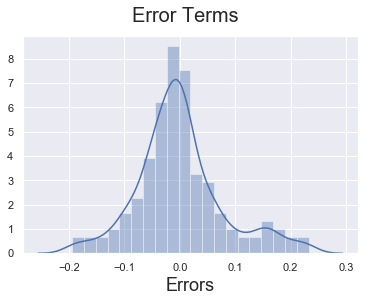

In [138]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

### 1.9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixteenth model.

#### Applying the scaling on the test sets

In [139]:
# Apply scaler() to all the columns except the categorical and 'dummy' variables
num_vars = ['carlength', 'carheight',
        'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm','horsepower', 'price','avgmpg','carwidth','curbweight','wheelbase']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,doornumber_two,fueltype_gas,aspiration_turbo,enginelocation_rear
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,...,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.44,0.56,0.48,0.56,0.43,0.27,0.56,0.54,0.21,0.25,...,0.03,0.85,0.08,0.00,0.00,0.00,0.44,0.89,0.18,0.03
std,0.21,0.19,0.17,0.22,0.18,0.16,0.23,0.16,0.27,0.16,...,0.18,0.36,0.27,0.00,0.00,0.00,0.50,0.32,0.39,0.18
min,0.00,0.06,0.18,0.14,0.13,0.07,-0.11,-0.06,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.31,0.46,0.36,0.38,0.31,0.18,0.40,0.48,0.09,0.11,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.39,0.55,0.44,0.59,0.41,0.23,0.56,0.59,0.12,0.22,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.57,0.72,0.52,0.70,0.56,0.32,0.75,0.64,0.15,0.30,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
max,1.18,1.09,0.98,1.06,0.94,0.93,0.89,0.86,1.00,0.66,...,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00


#### Dividing into X_test and y_test

In [140]:
y_test = df_test.pop('price')
X_test = df_test

In [141]:
X_train_new.columns

Index(['enginesize', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five'],
      dtype='object')

In [142]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [143]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [144]:
y_pred.shape

(62,)

In [145]:
filtered_df.price.shape

(205,)

### R square and Mean square error for test and train set

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
test_mse = mean_squared_error(y_test, y_pred)
test_r_squared = r2_score(y_test, y_pred)
train_mse = mean_squared_error(y_train, y_train_price)
train_r_squared = r2_score(y_train, y_train_price)


In [147]:
print('Mean_Squared_Error_For_Test:' ,test_mse)
print('r_square_value_for_test :',test_r_squared)
print('Mean_Squared_Error_For_Train:' ,train_mse)
print('r_square_value_for_train :',train_r_squared)

Mean_Squared_Error_For_Test: 0.007153752130253385
r_square_value_for_test : 0.8661555026972831
Mean_Squared_Error_For_Train: 0.00617483422521001
r_square_value_for_train : 0.8663263862389112


In [148]:
y_test.shape

(62,)

### Actual vs Predicted

Text(0, 0.5, 'Price')

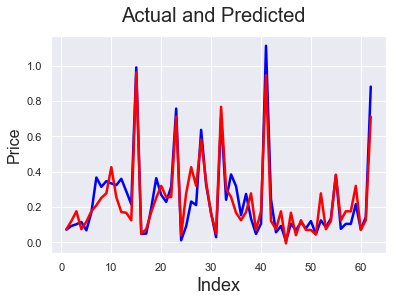

In [149]:

c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

From the graph it is clear it is not overfit or underfit. Thus a descent fit.

### Error terms

Text(0, 0.5, 'Predicted_price')

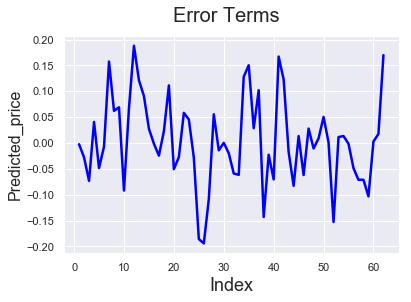

In [150]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Predicted_price', fontsize=16)                # Y-label

### 1.10: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [151]:
y_test.shape

(62,)

In [152]:
y_pred.shape

(62,)

Text(0, 0.5, 'y_pred')

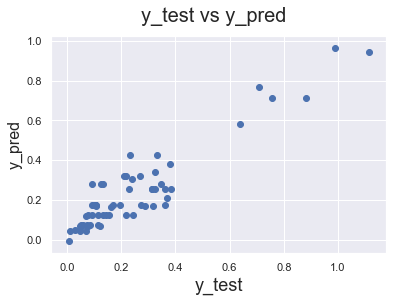

In [153]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:

$ price = 1.1205  \times  enginesize  
+  0.2233  \times  CarName`bmw` 
+ 0.2311 \times CarName`porsche` 
+ 0.2513 \times enginetype`rotor` 
+ 0.1474 \times cylindernumber`five` $

We have a couple of options to give to `Geely Auto` car manufacturers:
1. Manufacture `bmw/porsche` alike cars(with similar configuration/looks) with `bigger enginesize` , `enginetype as rotor` having `5 cylinders`.
2. This can increase sales and profit for the company